# Prediction using Decision Tree Algorithm
## LGMVIP - DATA SCIENCE
### BATCH - FEB 2023
### AUTHOR - SUCHITRA PATIL

#### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
df = pd.read_csv("C:/Users/admin/Desktop/Internships/Lets Grow More'/Iris (1).csv")

#### Data Inspecting

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.size

900

In [9]:
df.shape

(150, 6)

#### Data Cleaning

In [10]:
#drop unwanted column
df = df.drop(["Id"], axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Data Visualization

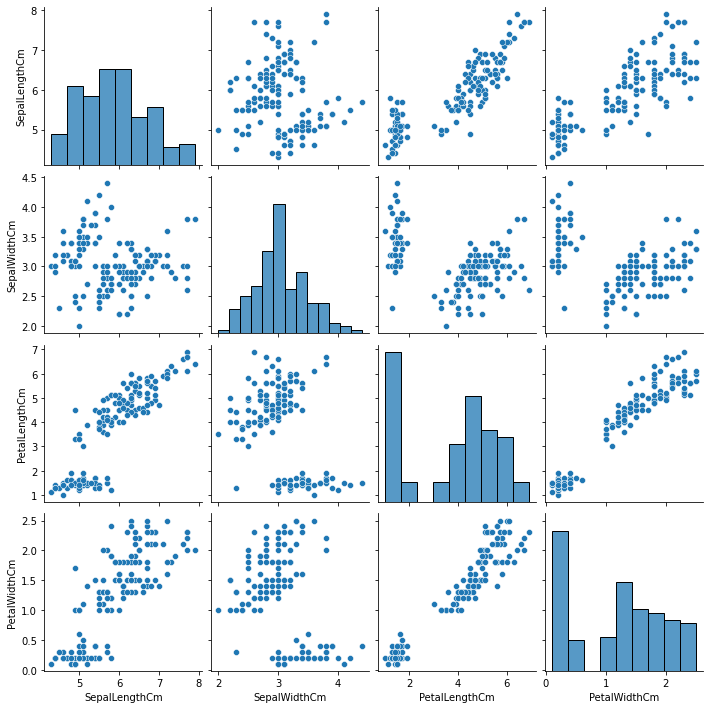

In [12]:
sns.pairplot(df)

#### Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Model Training

In [14]:
x = df.drop(["Species"],1)
x.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_12964/4255916441.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop(["Species"],1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

#### Train-Test split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Decision Tree Model Training

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [18]:
dtc.predict(x_test)

array([0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 1])

#### Calculating the Model accuracy

In [19]:
score = dtc.score(x_test, y_test)*100
print(score)

86.66666666666667


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test, dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.67      0.75         9
           2       0.73      0.89      0.80         9

    accuracy                           0.87        30
   macro avg       0.86      0.85      0.85        30
weighted avg       0.88      0.87      0.86        30



In [21]:
cm= metrics.confusion_matrix(y_test, dtc.predict(x_test))

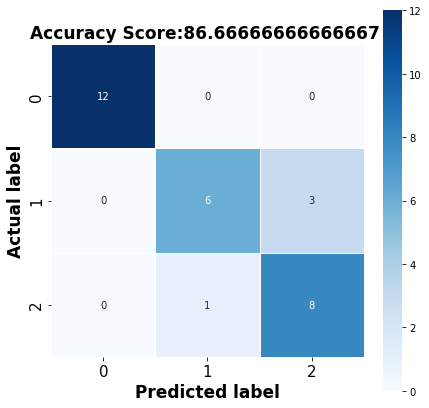

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
           fmt='.0f',
           linewidths=.5,
           square= True,
           cmap = 'Blues');
plt.ylabel('Actual label',fontsize = 17,fontweight = 'bold');
plt.xlabel('Predicted label', fontsize = 17, fontweight = 'bold');
plt.title('Accuracy Score:{} '.format(score),size =17, fontweight = 'bold');
plt.tick_params(labelsize= 15)

In [23]:
max_depth_range = list(range(1,6))
print(max_depth_range)

[1, 2, 3, 4, 5]


In [24]:
accuracy = []
for depth in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dtc.fit(x_train, y_train)
    score = dtc.score(x_test, y_test)
    accuracy.append(score)

In [25]:
fn= ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn= ['setosa','versicolor','virginica']

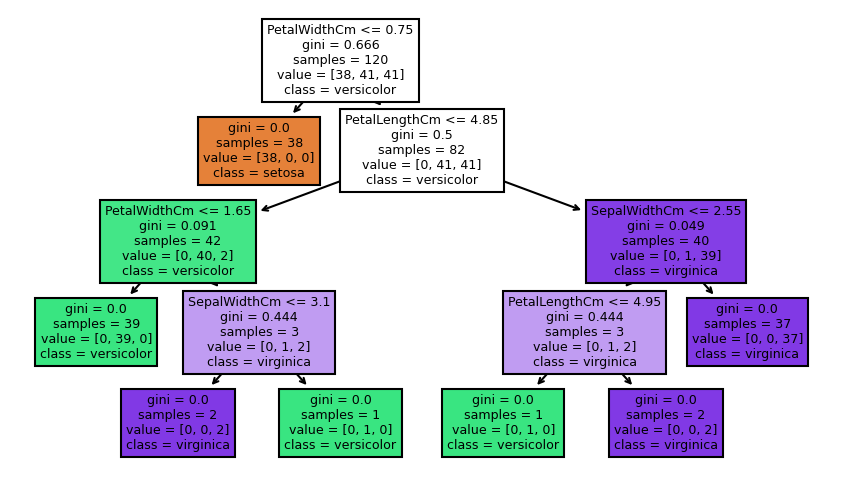

In [26]:
fig, axes = plt.subplots(nrows =1, ncols= 1, figsize= (7,4), dpi = 150)
tree.plot_tree(dtc,feature_names = fn, class_names= cn,filled = True);

# Thank You